# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Reading Data

In [2]:
data=pd.read_csv('Ml.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# Data Pre-processing

In [3]:
data.shape

(310, 7)

In [4]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

This Dataset contain no null values

In [5]:
data.duplicated().any()

False

In [6]:
# "class" to Binary data ("Abnormal" = 1, "Normal" = 0)
data["class"] = np.where(data["class"] == "Abnormal", 1, 0)
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [7]:
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int64
dtype: object

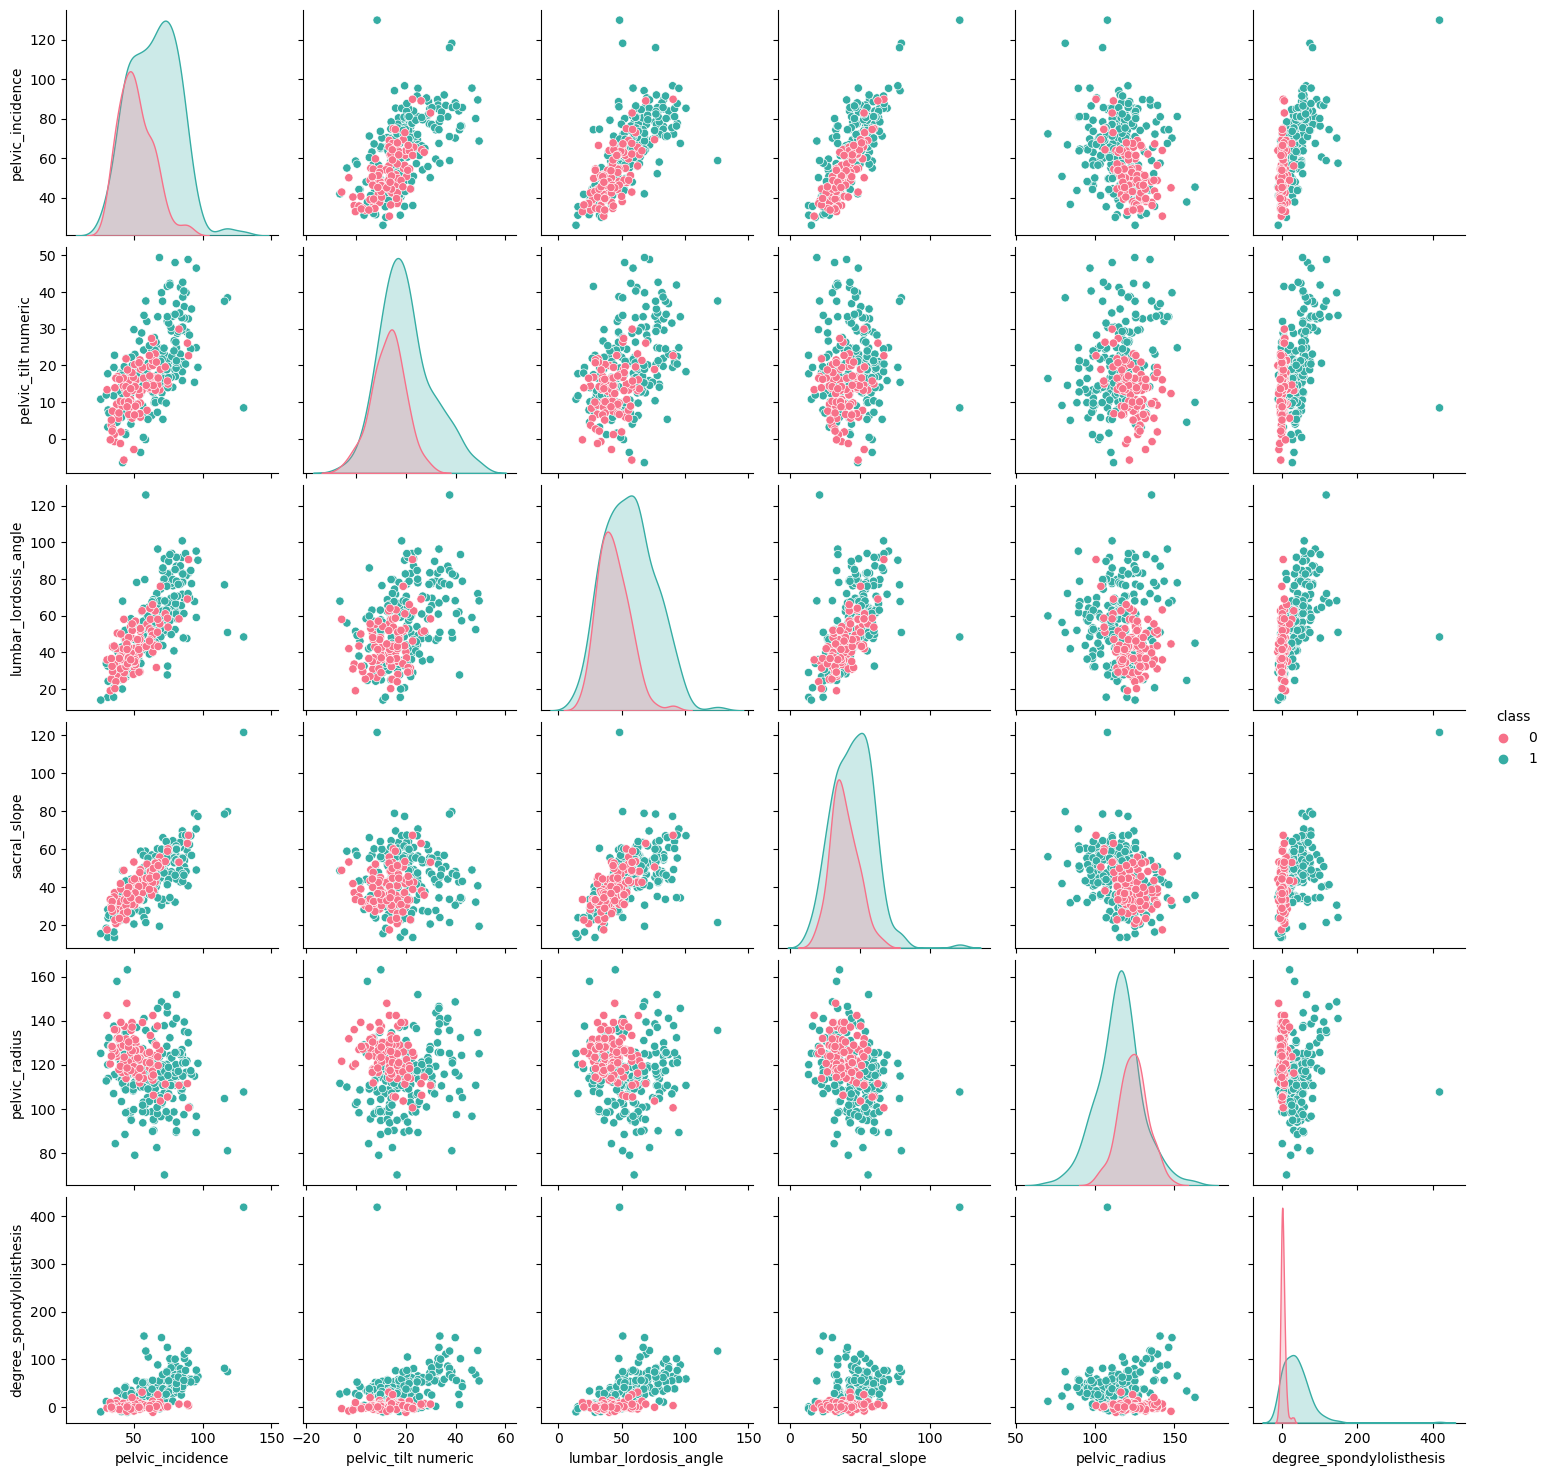

In [8]:
sns.pairplot(data,hue='class',palette='husl')
plt.show()

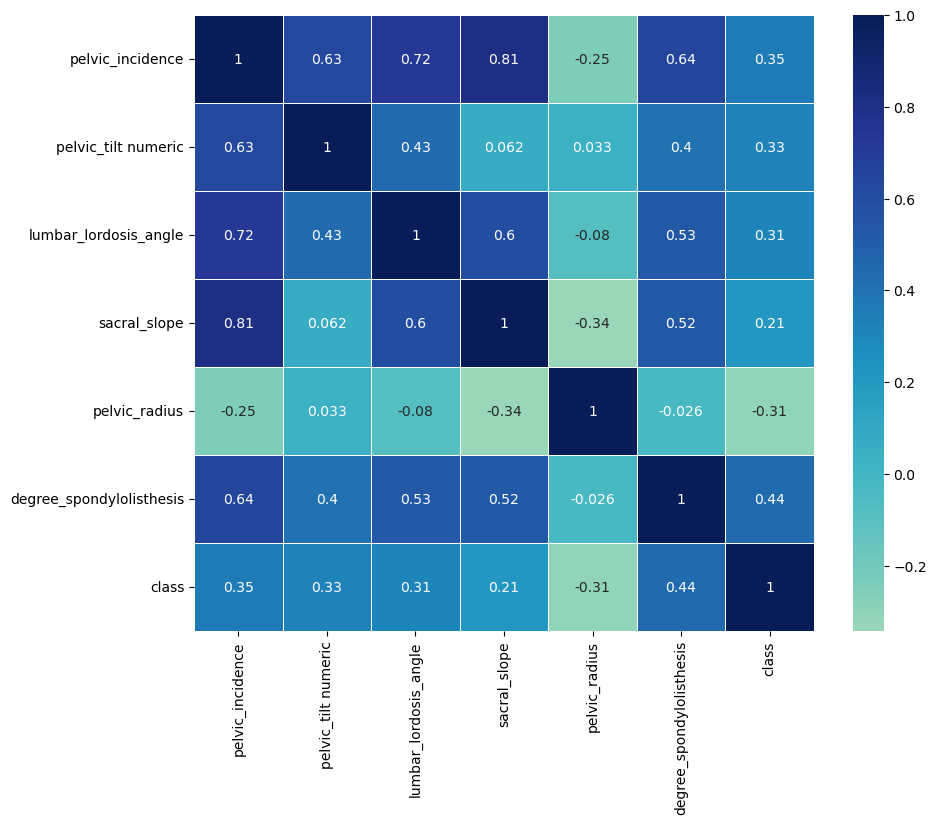

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),center=0,annot=True,linewidth=0.5,cmap="YlGnBu")
plt.show()

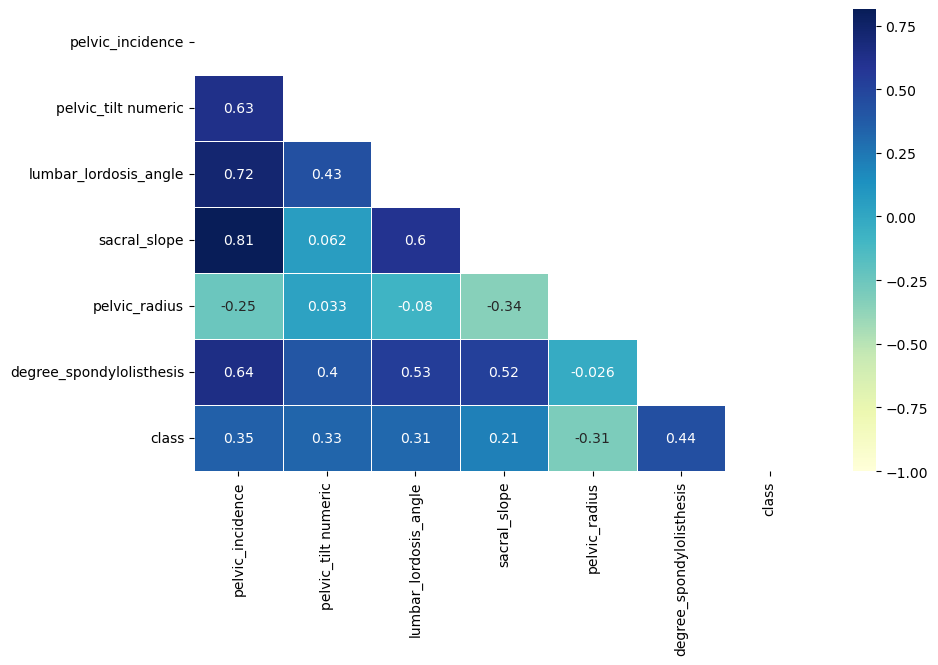

In [10]:
low_tri = np.triu(data.corr())
plt.figure(figsize = (10, 6))
sns.heatmap(data.corr(), annot = True, vmin = -1, cmap = "YlGnBu", mask = low_tri,linewidth=0.5)
plt.show()

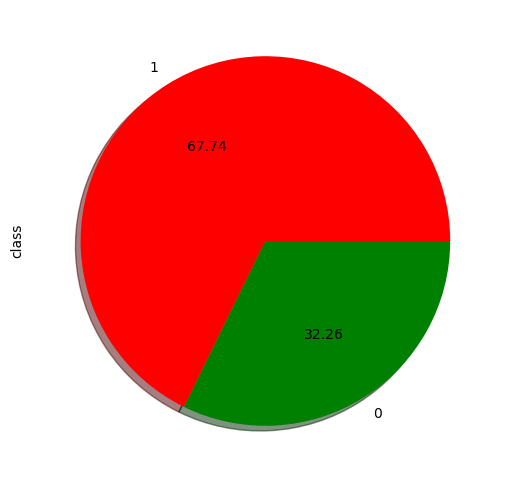

In [11]:
colors=('red','green')
data['class'].value_counts().plot(kind='pie',shadow=True,colors=colors,autopct='%.2f',figsize=(6,6))
plt.show()

# Models

# Linear Regression

1. dependent Variable : Pelvic incidence  
independent Variable : scaral slope 

In [12]:
x=np.array(data['sacral_slope'],dtype=float).reshape(-1,1)
y=np.array(data['pelvic_incidence'],dtype=float)
x_train=x[:290]
x_test=x[290:]
y_train=y[:290]
y_test=y[290:]

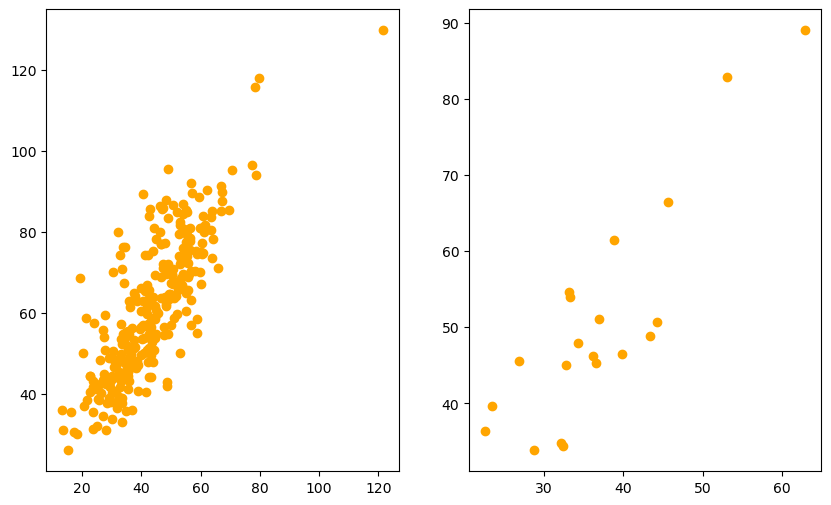

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,6))
axs[0].scatter(x_train, y_train, marker = "o", color = "orange")
axs[1].scatter(x_test, y_test, marker = "o", color = "orange")
plt.show()

In [14]:
model_1 = LinearRegression()

In [15]:
model_1.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred=model_1.predict(x_test)
print('\norignal test value :\n\n',y_test,'\n \nPredicted test value :\n\n',y_pred)


orignal test value :

 [36.42248549 51.07983294 34.75673809 48.90290434 46.23639915 46.42636614
 39.65690201 45.57548229 66.50717865 82.90535054 50.67667667 89.01487529
 54.60031622 34.38229939 45.07545026 47.90356517 53.93674778 61.44659663
 45.25279209 33.84164075] 
 
Predicted test value :

 [39.73709197 54.4766858  49.59508571 61.10779678 53.76035765 57.4969362
 40.66816671 44.13349148 63.46808348 71.08305273 62.03358152 81.29673163
 50.60984585 49.79531074 50.25712565 51.81924812 50.71674902 56.41262927
 54.15748417 46.14101114]


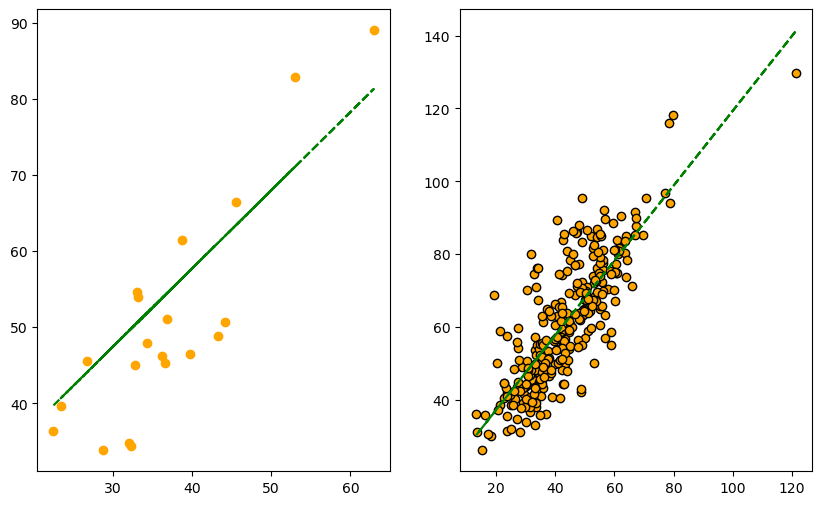

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,6))
axs[0].scatter(x_test, y_test, marker = "o", color = "orange")
axs[0].plot(x_test, x_test*model_1.coef_ + model_1.intercept_, color = "green", linewidth = 1.6,linestyle='--')

axs[1].scatter(x_train, y_train, marker = "o", color = "orange",edgecolors='k')
axs[1].plot(x_train, x_train*model_1.coef_ + model_1.intercept_, color = "green",linewidth = 1.6,linestyle='--')
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Sum Error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Square Error : ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error :  7.334889680115293
Mean Sum Error :  73.67134418918741
Root Mean Square Error :  8.583201278613208


# Decision Tree

In [19]:
x=data.drop(['class'],axis=1)
y=data['class']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=100)

In [22]:
model_3 = DecisionTreeClassifier()

In [23]:
criterion = ["gini", "entropy"]
max_depth = np.array([3, 4, 5, 6, 7, 8, 9])
min_samples_split = np.array([3, 4, 5, 6, 7, 8, 9])
param_grid = {"criterion": criterion, "max_depth": max_depth, "min_samples_split": min_samples_split}
GridTree = GridSearchCV(estimator = model_3, param_grid = param_grid, cv = 5)
GridTree.fit(x_train,y_train)
print(f"best criterion: {GridTree.best_estimator_.criterion}")
print(f"max_depth: {GridTree.best_estimator_.max_depth}")
print(f"min_samples_split: {GridTree.best_estimator_.min_samples_split}")

best criterion: gini
max_depth: 3
min_samples_split: 6


In [24]:
model_3= DecisionTreeClassifier(criterion = "gini", max_depth = 3, min_samples_split=3)
model_3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [28]:
from sklearn.tree import plot_tree

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

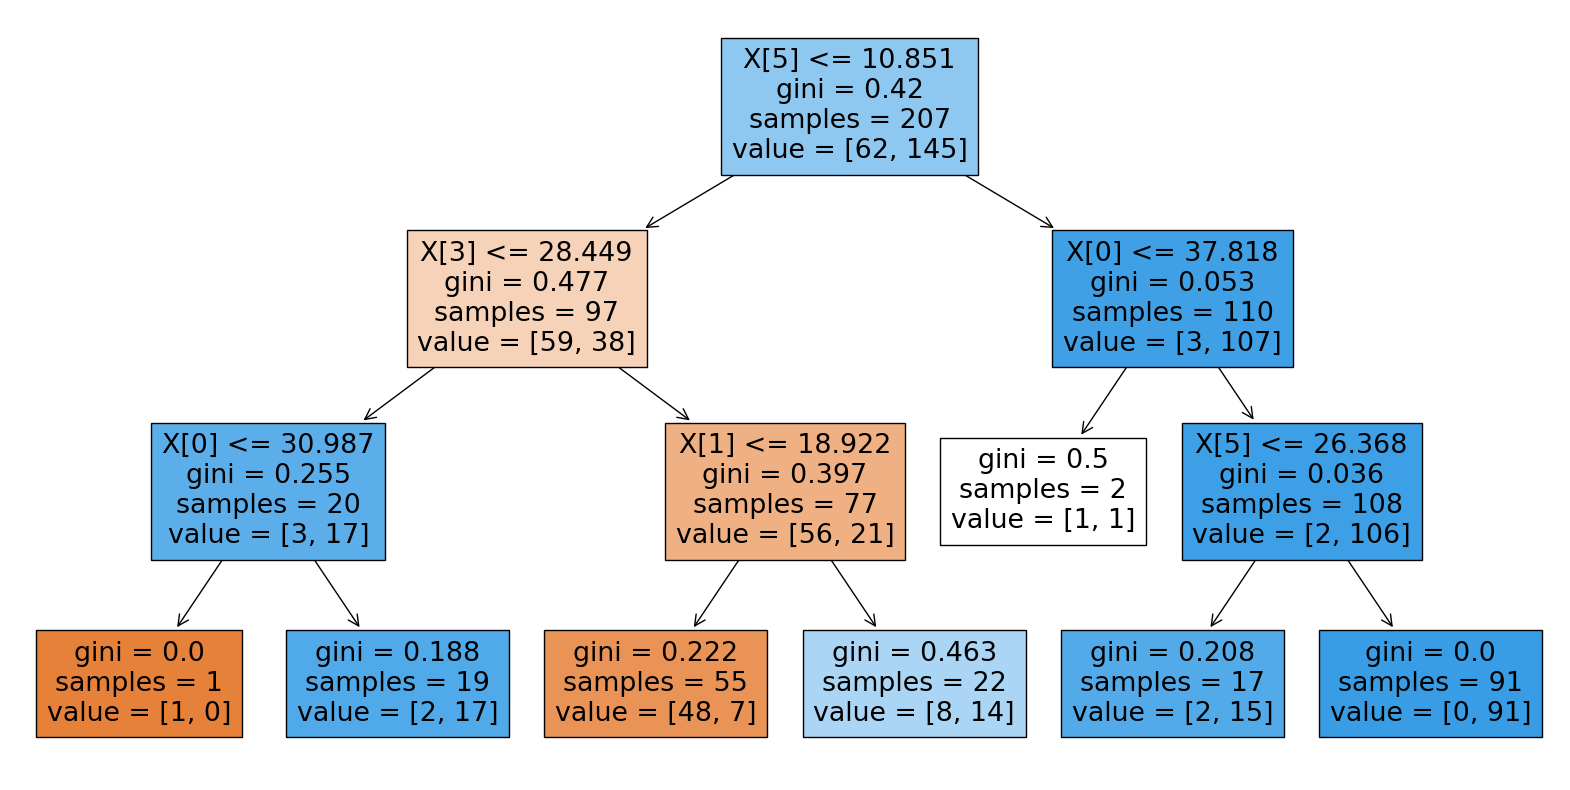

In [29]:
plt.figure(figsize=(20,10))  # Set the figure size for larger plot
plot_tree(model_3, filled=True)
plt.show()

In [30]:
y_pred = model_3.predict(x_test)


In [31]:
confusion_matrix = confusion_matrix(y_test, y_pred)

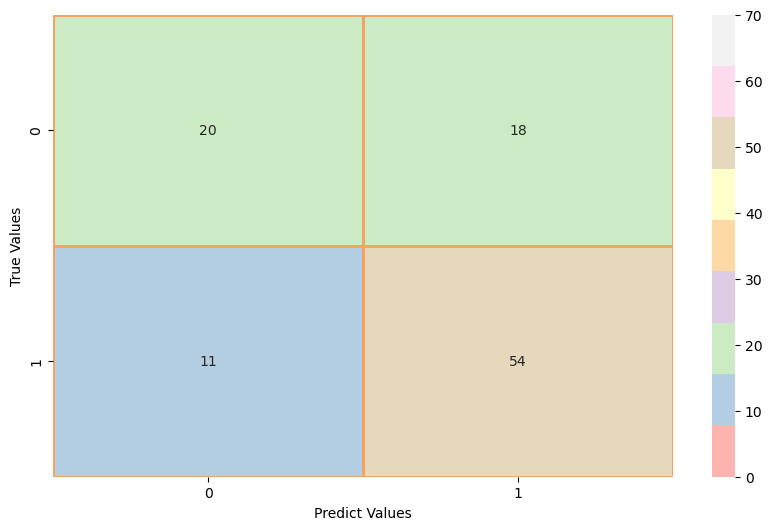

In [32]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix, annot = True, vmin = 0, vmax = 70, cmap = "Pastel1", linewidth = 2, 
            linecolor="sandybrown")
plt.xlabel("Predict Values")
plt.ylabel("True Values")
plt.show()

In [27]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(f"precision_score = {precision_score(y_test, y_pred)}")
print(f"recall_score = {recall_score(y_test, y_pred)}")
print(f"f1_score = {f1_score(y_test, y_pred)}")

Accuracy = 0.7281553398058253
precision_score = 0.7534246575342466
recall_score = 0.8461538461538461
f1_score = 0.7971014492753623


In [28]:
print('Training set score: {:.4f}'.format(model_3.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model_3.score(x_test, y_test)))

Training set score: 0.9034
Test set score: 0.7282


[Text(181.35000000000002, 190.26, 'X[5] <= 10.851\ngini = 0.42\nsamples = 207\nvalue = [62, 145]'),
 Text(111.60000000000001, 135.9, 'X[3] <= 28.449\ngini = 0.477\nsamples = 97\nvalue = [59, 38]'),
 Text(55.800000000000004, 81.53999999999999, 'X[4] <= 139.975\ngini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(83.7, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.4, 81.53999999999999, 'X[1] <= 18.922\ngini = 0.397\nsamples = 77\nvalue = [56, 21]'),
 Text(139.5, 27.180000000000007, 'gini = 0.222\nsamples = 55\nvalue = [48, 7]'),
 Text(195.3, 27.180000000000007, 'gini = 0.463\nsamples = 22\nvalue = [8, 14]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 37.818\ngini = 0.053\nsamples = 110\nvalue = [3, 107]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(279.0, 81.53999999999999, 'X[5] <= 26.368\ngini = 0.036\nsamples = 10

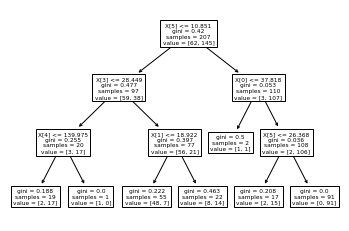

In [29]:
from sklearn import tree
tree.plot_tree(model_3.fit(x_train, y_train)) 

# KNN Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [32]:
x=(x - np.min(x))/(np.max(x) - np.min(x)) #normalization

In [33]:
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=20)

In [35]:
model_4=KNeighborsClassifier(n_neighbors=22)
model_4.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=22)

In [36]:
y_test_pred=model_4.predict(x_test)

In [37]:
y_test_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

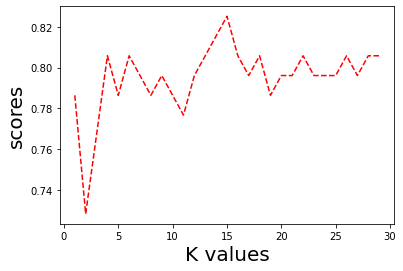

In [38]:
score_list=[]
for i in range(1,30):
    Knn_2=KNeighborsClassifier(n_neighbors=i)
    Knn_2.fit(x_train,y_train)
    score_list.append(Knn_2.score(x_test,y_test))
plt.plot(range(1,30),score_list,color='red',ls='--')
plt.xlabel("K values",size=20)
plt.ylabel("scores",size=20)
plt.show()

In [39]:
print('Accuracy : ',accuracy_score(y_test, y_test_pred))

Accuracy :  0.8058252427184466


In [40]:
print('Training set score: {:.4f}'.format(model_4.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model_4.score(x_test, y_test)))

Training set score: 0.8213
Test set score: 0.8058


In [41]:
#predicting 1st sample
y_head=model_4.predict(np.array([[63.02,22.55,39.60,40.47,98.67,-0.25]]))#first data
print(y_head)

[1]


# Support Vector machine

In [42]:
from sklearn.svm import SVC
model_5=SVC(random_state=42)

In [43]:
model_5.fit(x_train,y_train)

SVC(random_state=42)

In [44]:
y_pred=model_5.predict(x_test)

In [45]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [46]:
print('Accuracy : ',accuracy_score(y_test, y_pred))

Accuracy :  0.8155339805825242


In [47]:
print('Training set score: {:.4f}'.format(model_5.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model_5.score(x_test, y_test)))

Training set score: 0.8502
Test set score: 0.8155


In [48]:
y_head=model_4.predict(np.array([[63.02,22.55,39.60,40.47,98.67,-0.25]]))#first data
print(y_head)

[1]


We carefully implemented and assessed a variety of machine learning models, including K-Nearest Neighbor (KNN), Decision Tree, Support Vector Machine (SVM), and Linear Regression, in our extensive investigation of the biomechanical characteristics of orthopedic patients. With the goal to categorize  patients into 'Normal' and 'Abnormal' groups based on vital biomechanical characteristics of the pelvis and lumbar spine, each model contributed unique insights and strengths to our investigation. It was clear that the Support Vector Machine (SVM) algorithm performed better than the others after carefully comparing their performance characteristics. SVM turned out to be the most successful tool in our experiment, exhibiting excellent accuracy and resilience and demonstrating its promise as a key tool in the field of medical diagnostics and patient categorization in orthopedic care.